In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision.datasets import FashionMNIST
from torchvision import transforms

from random import randint
from tqdm import tqdm

import matplotlib.pyplot as plt

In [2]:
print(torch.backends.mps.is_available())
#device = torch.device("cpu")
device = torch.device("mps")

True


In [3]:
t = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
dataset_train = FashionMNIST(root="../datasets/", train=True, download=True, transform=t)
dataset_test = FashionMNIST(root="../datasets/", train=False, download=True, transform=t)

In [4]:
train_dataloader = DataLoader(dataset=dataset_train, batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset=dataset_test, batch_size=10000, shuffle=False)

In [5]:
class alexnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(11, 11), stride=(4, 4)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)),
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(5,5), padding=(2,2)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3,3), padding=(1,1)),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(3,3),padding=(1,1)),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3,3), padding=(1,1)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(3,3), stride=(2,2)),
            nn.Flatten(),
            nn.Linear(in_features=16*5*5, out_features=32),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=16),
            nn.ReLU(),
            nn.Linear(in_features=16, out_features=10),
            nn.LogSoftmax(dim=1)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [6]:
device = torch.device(device)
model = alexnet().to(device)

In [7]:
N_EPOCHS = 5

B_EPOCHS = int(60_000 / 32)

optim = torch.optim.SGD(params=model.parameters(), lr=0.001)
loss_fn = nn.NLLLoss()
#loss_fn = nn.CrossEntropyLoss()
def acc_fn(pred, target):
  return (pred.argmax(dim=1)==target).sum()

In [11]:
losses = []
accs = []

prog_bar = tqdm(range(N_EPOCHS))

for e in prog_bar:
    for i, (x, y) in enumerate(train_dataloader):
        optim.zero_grad()
        pred = model(x.to(device))

        loss = loss_fn(pred, y.to(device))
        losses.append(loss.item()/32)

        acc = acc_fn(pred.detach().cpu(), y.detach().cpu())
        accs.append(acc.item()/32)

        loss.backward()
        optim.step()
        if i % 150 == 0: 
            print(f"Epoch: {e} --- {i}/{B_EPOCHS} --- Loss: {loss.item()/32} --- Acc: {acc.item()/32}")

  0%|                                                                                                                            | 0/5 [00:00<?, ?it/s]

Epoch: 0 --- 0/1875 --- Loss: 0.07219818234443665 --- Acc: 0.09375
Epoch: 0 --- 150/1875 --- Loss: 0.0721389502286911 --- Acc: 0.125
Epoch: 0 --- 300/1875 --- Loss: 0.07180855423212051 --- Acc: 0.09375
Epoch: 0 --- 450/1875 --- Loss: 0.07209280133247375 --- Acc: 0.125
Epoch: 0 --- 600/1875 --- Loss: 0.07158590853214264 --- Acc: 0.1875
Epoch: 0 --- 750/1875 --- Loss: 0.07228794693946838 --- Acc: 0.03125
Epoch: 0 --- 900/1875 --- Loss: 0.0720369815826416 --- Acc: 0.03125
Epoch: 0 --- 1050/1875 --- Loss: 0.07224394381046295 --- Acc: 0.15625
Epoch: 0 --- 1200/1875 --- Loss: 0.07214590907096863 --- Acc: 0.09375
Epoch: 0 --- 1350/1875 --- Loss: 0.0720517709851265 --- Acc: 0.0625
Epoch: 0 --- 1500/1875 --- Loss: 0.07199019938707352 --- Acc: 0.0625
Epoch: 0 --- 1650/1875 --- Loss: 0.07245595753192902 --- Acc: 0.15625
Epoch: 0 --- 1800/1875 --- Loss: 0.07217889279127121 --- Acc: 0.125


 20%|███████████████████████▏                                                                                            | 1/5 [00:24<01:39, 24.88s/it]

Epoch: 1 --- 0/1875 --- Loss: 0.07191629707813263 --- Acc: 0.125
Epoch: 1 --- 150/1875 --- Loss: 0.07196956127882004 --- Acc: 0.125
Epoch: 1 --- 300/1875 --- Loss: 0.07204669713973999 --- Acc: 0.09375
Epoch: 1 --- 450/1875 --- Loss: 0.07227183133363724 --- Acc: 0.03125
Epoch: 1 --- 600/1875 --- Loss: 0.07200071960687637 --- Acc: 0.03125
Epoch: 1 --- 750/1875 --- Loss: 0.07196277379989624 --- Acc: 0.125
Epoch: 1 --- 900/1875 --- Loss: 0.0719539225101471 --- Acc: 0.0
Epoch: 1 --- 1050/1875 --- Loss: 0.07202619314193726 --- Acc: 0.0625
Epoch: 1 --- 1200/1875 --- Loss: 0.07190541923046112 --- Acc: 0.03125
Epoch: 1 --- 1350/1875 --- Loss: 0.07175438106060028 --- Acc: 0.125
Epoch: 1 --- 1500/1875 --- Loss: 0.07180080562829971 --- Acc: 0.09375
Epoch: 1 --- 1650/1875 --- Loss: 0.07201249897480011 --- Acc: 0.15625
Epoch: 1 --- 1800/1875 --- Loss: 0.07219430059194565 --- Acc: 0.09375


 40%|██████████████████████████████████████████████▍                                                                     | 2/5 [00:50<01:15, 25.23s/it]

Epoch: 2 --- 0/1875 --- Loss: 0.07204169780015945 --- Acc: 0.125
Epoch: 2 --- 150/1875 --- Loss: 0.07204167544841766 --- Acc: 0.1875
Epoch: 2 --- 300/1875 --- Loss: 0.0718364268541336 --- Acc: 0.0625
Epoch: 2 --- 450/1875 --- Loss: 0.07203064858913422 --- Acc: 0.0625
Epoch: 2 --- 600/1875 --- Loss: 0.07179933786392212 --- Acc: 0.09375
Epoch: 2 --- 750/1875 --- Loss: 0.07179422676563263 --- Acc: 0.1875
Epoch: 2 --- 900/1875 --- Loss: 0.07205645740032196 --- Acc: 0.03125
Epoch: 2 --- 1050/1875 --- Loss: 0.07205072045326233 --- Acc: 0.03125
Epoch: 2 --- 1200/1875 --- Loss: 0.07209453731775284 --- Acc: 0.0
Epoch: 2 --- 1350/1875 --- Loss: 0.07210569828748703 --- Acc: 0.0
Epoch: 2 --- 1500/1875 --- Loss: 0.07199926674365997 --- Acc: 0.0625
Epoch: 2 --- 1650/1875 --- Loss: 0.07207269966602325 --- Acc: 0.125
Epoch: 2 --- 1800/1875 --- Loss: 0.07197926938533783 --- Acc: 0.125


 60%|█████████████████████████████████████████████████████████████████████▌                                              | 3/5 [01:15<00:50, 25.33s/it]

Epoch: 3 --- 0/1875 --- Loss: 0.07199054956436157 --- Acc: 0.09375
Epoch: 3 --- 150/1875 --- Loss: 0.07200969755649567 --- Acc: 0.0625
Epoch: 3 --- 300/1875 --- Loss: 0.07188169658184052 --- Acc: 0.0
Epoch: 3 --- 450/1875 --- Loss: 0.07184944301843643 --- Acc: 0.0625
Epoch: 3 --- 600/1875 --- Loss: 0.07186660170555115 --- Acc: 0.21875
Epoch: 3 --- 750/1875 --- Loss: 0.07189375907182693 --- Acc: 0.125
Epoch: 3 --- 900/1875 --- Loss: 0.07185089588165283 --- Acc: 0.0
Epoch: 3 --- 1050/1875 --- Loss: 0.0719771608710289 --- Acc: 0.09375
Epoch: 3 --- 1200/1875 --- Loss: 0.07217536866664886 --- Acc: 0.09375
Epoch: 3 --- 1350/1875 --- Loss: 0.0719357579946518 --- Acc: 0.1875
Epoch: 3 --- 1500/1875 --- Loss: 0.07207834720611572 --- Acc: 0.0625
Epoch: 3 --- 1650/1875 --- Loss: 0.07180991768836975 --- Acc: 0.125
Epoch: 3 --- 1800/1875 --- Loss: 0.07199962437152863 --- Acc: 0.15625


 80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 4/5 [01:41<00:25, 25.44s/it]

Epoch: 4 --- 0/1875 --- Loss: 0.07194647192955017 --- Acc: 0.21875
Epoch: 4 --- 150/1875 --- Loss: 0.0719609260559082 --- Acc: 0.03125
Epoch: 4 --- 300/1875 --- Loss: 0.07192718982696533 --- Acc: 0.09375
Epoch: 4 --- 450/1875 --- Loss: 0.0720592737197876 --- Acc: 0.0625
Epoch: 4 --- 600/1875 --- Loss: 0.07190325856208801 --- Acc: 0.09375
Epoch: 4 --- 750/1875 --- Loss: 0.0718812644481659 --- Acc: 0.125
Epoch: 4 --- 900/1875 --- Loss: 0.07174815237522125 --- Acc: 0.15625
Epoch: 4 --- 1050/1875 --- Loss: 0.07187269628047943 --- Acc: 0.09375
Epoch: 4 --- 1200/1875 --- Loss: 0.07207494974136353 --- Acc: 0.09375
Epoch: 4 --- 1350/1875 --- Loss: 0.07200053334236145 --- Acc: 0.0
Epoch: 4 --- 1500/1875 --- Loss: 0.07193551957607269 --- Acc: 0.1875
Epoch: 4 --- 1650/1875 --- Loss: 0.0718727856874466 --- Acc: 0.09375
Epoch: 4 --- 1800/1875 --- Loss: 0.07205234467983246 --- Acc: 0.0


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:07<00:00, 25.41s/it]


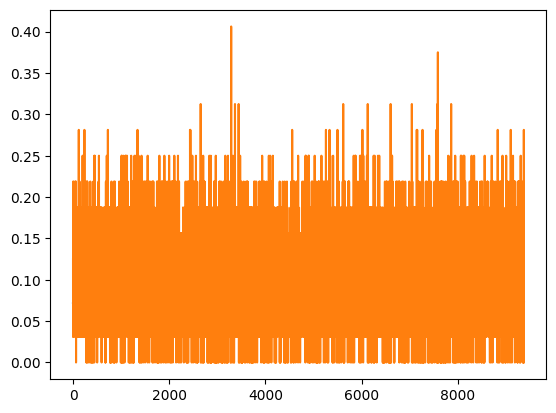

In [10]:
plt.plot(losses)
plt.plot(accs)

In [69]:
model.eval()
score = 0
for x, y in test_dataloader:
  score += acc_fn(model(x.to(device)).detach().cpu(), y)
print(score)

tensor(9002)
